# Exploring the Evolution of Stars

1) Generate a Hertzsprung-Russell diagram, $log_{10}\frac{L}{L_{\odot}}$ versus $log_{10}(T_{eff})$ (with $T_{eff}$ increasing to the left), which shows the evolutionary tracks of all five stars. The tracks should be appropriately labeled and the range of each axis should be large enough to show the position of all the stars at all times. On your figure please label or otherwise identify (1) the zero-age main sequence; and (2) the point of helium ignition.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import math
import glob
import numpy as np
from scipy import stats
from __future__ import division, print_function

In [2]:
# Reads in the mass and log(radius) for each star
log_lum05,log_temp05 = np.loadtxt("MESA_0.5/trimmed_history.data", skiprows=6, usecols=(3,5), unpack=True)
log_lum1,log_temp1 = np.loadtxt("MESA_1.0/trimmed_history.data", skiprows=6, usecols=(3,5), unpack=True)
log_lum3,log_temp3 = np.loadtxt("MESA_3.0/trimmed_history.data", skiprows=6, usecols=(3,5), unpack=True)
log_lum8,log_temp8 = np.loadtxt("MESA_8.0/trimmed_history.data", skiprows=6, usecols=(3,5), unpack=True)
log_lum15,log_temp15 = np.loadtxt("MESA_15.0/trimmed_history.data", skiprows=6, usecols=(3,5), unpack=True)

In [3]:
hist05=np.loadtxt('MESA_0.5/trimmed_history.data',skiprows=6)
HI_05=hist05[:,10]
first_05=np.where((HI_05[0]-HI_05)>3e-3)[0]

hist1=np.loadtxt('MESA_1.0/trimmed_history.data',skiprows=6)
HI_1=hist1[:,10]
first_1=np.where((HI_1[0]-HI_1)>3e-3)[0]

hist3=np.loadtxt('MESA_3.0/trimmed_history.data',skiprows=6)
HI_3=hist3[:,10]
first_3=np.where((HI_3[0]-HI_3)>3e-3)[0]

hist8=np.loadtxt('MESA_8.0/trimmed_history.data',skiprows=6)
HI_8=hist8[:,10]
first_8=np.where((HI_8[0]-HI_8)>3e-3)[0]

hist15=np.loadtxt('MESA_15.0/trimmed_history.data',skiprows=6)
HI_15=hist15[:,10]
first_15=np.where((HI_15[0]-HI_15)>3e-3)[0]

# Assign columns to luminosity and temperature
L_05=log_lum05[first_05]
T_05=log_temp05[first_05]

L_1=log_lum1[first_1]
T_1=log_temp1[first_1]

L_3=log_lum3[first_3]
T_3=log_temp3[first_3]

L_8=log_lum8[first_8]
T_8=log_temp8[first_8]

L_15=log_lum15[first_15]
T_15=log_temp15[first_15]

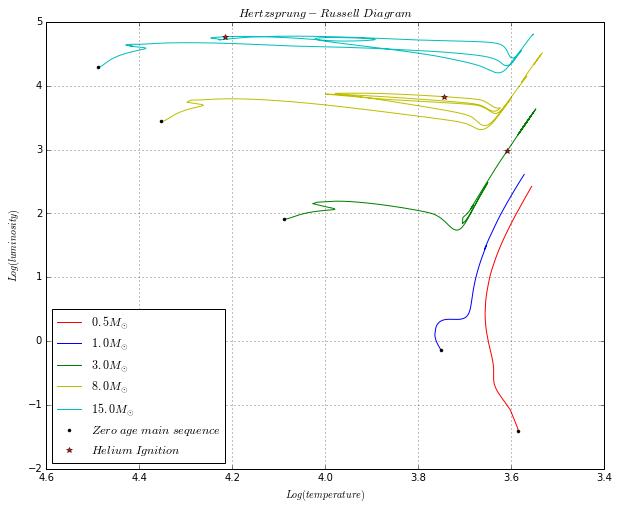

In [4]:
# Plots log luminosity vs. log temperature

plt.figure(figsize=(10,8))
plt.plot(T_05,L_05,'r',label='$0.5 M_{\odot}$')
plt.plot(T_1,L_1,'b',label='$1.0 M_{\odot}$')
plt.plot(T_3,L_3,'g',label='$3.0 M_{\odot}$')
plt.plot(T_8,L_8,'y',label='$8.0 M_{\odot}$')
plt.plot(T_15,L_15,'c',label='$15.0 M_{\odot}$')

# Zero age main sequence

plt.plot(T_05[0],L_05[0],'k.')
plt.plot(T_1[0],L_1[0],'k.')
plt.plot(T_3[0],L_3[0],'k.')
plt.plot(T_8[0],L_8[0],'k.')
plt.plot(T_15[0],L_15[0],'k.',label='$Zero\ age\ main\ sequence$')

# Helium ignition - only occurs with 3,8, and 15 solar mass stars because 0.5 and 1 stay on the main sequence forever

plt.plot(log_temp3[first_3[1464]],log_lum3[first_3[1464]],'r*')
plt.plot(log_temp8[first_8[1434]],log_lum8[first_8[1434]],'r*')
plt.plot(log_temp15[first_15[1292]],log_lum15[first_15[1292]],'r*',label='$Helium\ Ignition$')

plt.grid(True)
plt.gca().invert_xaxis()
plt.xlabel('$Log(temperature)$')
plt.ylabel('$Log(luminosity)$')
plt.title('$Hertzsprung-Russell\ Diagram$')
plt.legend(loc='lower left',numpoints=1)
plt.savefig('Hertzsprung-Russell Diagram')

The zero-age main sequence is the left-most portion of each line (left to right) until it turns directions and goes right to left. The point where it turns directions is known as the helium flash. 

2) Using the available output files, determine (approximately, in millions or billions of years) the time it takes each star to leave the main sequence and the total lifetime of the star (which you can take to be the time at which the code stops).

In [142]:
H_massfrac05,age_05 = np.loadtxt("MESA_0.5/trimmed_history.data",skiprows=6,usecols=(10,1),unpack=True)
H_massfrac1,age_1 = np.loadtxt("MESA_1.0/trimmed_history.data",skiprows=6,usecols=(10,1),unpack=True)
H_massfrac3,age_3 = np.loadtxt("MESA_3.0/trimmed_history.data",skiprows=6,usecols=(10,1),unpack=True)
H_massfrac8,age_8 = np.loadtxt("MESA_8.0/trimmed_history.data",skiprows=6,usecols=(10,1),unpack=True)
H_massfrac15,age_15 = np.loadtxt("MESA_15.0/trimmed_history.data",skiprows=6,usecols=(10,1),unpack=True)

In [334]:
# Find what index the Hydrogen mass fraction is practically zero to determine when the star leaves the main sequence.
print (np.where(H_massfrac05<0.001)[0][0])
print (np.where(H_massfrac1<0.001)[0][0])
print (np.where(H_massfrac3<0.001)[0][0])
print (np.where(H_massfrac8<0.001)[0][0])
print (np.where(H_massfrac15<0.001)[0][0])

print ()

# Find the time that the hydrogen mass fraction corresponds to
print ('The time it takes a 0.5 solar mass star to leave the main sequence is %f billion years.' %(age_05[871]/1e9))
print ('The time it takes a 1.0 solar mass star to leave the main sequence is %f million years.' %(age_1[841]/1e6))
print ('The time it takes a 3.0 solar mass star to leave the main sequence is %f million years.' %(age_3[1061]/1e6))
print ('The time it takes a 8.0 solar mass star to leave the main sequence is %f million years.' %(age_8[1095]/1e6))
print ('The time it takes a 15.0 solar mass star to leave the main sequence is %f million years.' %(age_15[1169]/1e6))

print ()

# Take the last index of hydrogen mass fraction to find total lifetime of the star
print ('The total lifetime of a 0.5 solar mass star is %f billion years.' %(age_05[len(H_massfrac05)-1]/1e9))
print ('The total lifetime of a 1.0 solar mass star is %f billion years.' %(age_1[len(H_massfrac1)-1]/1e9))
print ('The total lifetime of a 3.0 solar mass star is %f million years.' %(age_3[len(H_massfrac3)-1]/1e6))
print ('The total lifetime of a 8.0 solar mass star is %f million years.' %(age_8[len(H_massfrac8)-1]/1e6))
print ('The total lifetime of a 15.0 solar mass star is %f million years.' %(age_15[len(H_massfrac15)-1]/1e6))

871
841
1061
1095
1169

The time it takes a 0.5 solar mass star to leave the main sequence is 118.577470 billion years.
The time it takes a 1.0 solar mass star to leave the main sequence is 8653.614682 million years.
The time it takes a 3.0 solar mass star to leave the main sequence is 302.491642 million years.
The time it takes a 8.0 solar mass star to leave the main sequence is 29.767114 million years.
The time it takes a 15.0 solar mass star to leave the main sequence is 10.714606 million years.

The total lifetime of a 0.5 solar mass star is 131.248722 billion years.
The total lifetime of a 1.0 solar mass star is 12.030691 billion years.
The total lifetime of a 3.0 solar mass star is 448.551741 million years.
The total lifetime of a 8.0 solar mass star is 35.432639 million years.
The total lifetime of a 15.0 solar mass star is 12.133000 million years.


3) Plot the trajectory of each model (mass) in the $log_{10} \rho_c − log_{10} T_c$ plane (central temperature vs. central density). On your plot, include the boundary defined by: 

$$ T_c/ \rho_c^{2/3}=1261 K m^2 kg^{-2/3}$$

Need to convert to $K cm^3 g$

$$ log_{10} T_c = \frac{2}{3} log_{10}(1261) + \frac{2}{3}log\rho_c$$

$$ 1261 \frac{Km^2}{kg^{2/3}} \bigg(\frac{100 cm}{1 m}\bigg) \bigg(\frac{100 cm}{1 m}\bigg) \bigg(\frac{100 cm}{1 m}\bigg) \bigg(\frac{1 kg}{1000 g}\bigg)^{2/3} = 126100 Kcm^2g$$

which divides the plane into regions where electron degeneracy is important (low $T_c$, high $\rho_c$) and unimportant (high $T_c$, low $\rho_c$). Also show the threshold for helium ignition

$$ log_{10} T_c \approx 8.9-0.113 log_{10} \rho_c$$

From this figure, determine which star(s) will ignite helium explosively and which will not. Please explain why.

In [87]:
logt_center05,logd_center05 = np.loadtxt("MESA_0.5/trimmed_history.data",skiprows=6,usecols=(6,7),unpack=True)
logt_center1,logd_center1 = np.loadtxt("MESA_1.0/trimmed_history.data",skiprows=6,usecols=(6,7),unpack=True)
logt_center3,logd_center3 = np.loadtxt("MESA_3.0/trimmed_history.data",skiprows=6,usecols=(6,7),unpack=True)
logt_center8,logd_center8 = np.loadtxt("MESA_8.0/trimmed_history.data",skiprows=6,usecols=(6,7),unpack=True)
logt_center15,logd_center15 = np.loadtxt("MESA_15.0/trimmed_history.data",skiprows=6,usecols=(6,7),unpack=True)

In [329]:
# Densities for main sequence stars

logd_05 = (logd_center05)[first_05]
logd_1 = (logd_center1)[first_1]
logd_3 = (logd_center3)[first_3]
logd_8 = (logd_center8)[first_8]
logd_15 = (logd_center15)[first_15]

logt_05 = logt_center05[first_05]
logt_1 = logt_center1[first_1]
logt_3 = logt_center3[first_3]
logt_8 = logt_center8[first_8]
logt_15 = logt_center15[first_15]

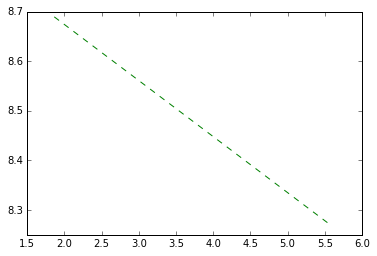

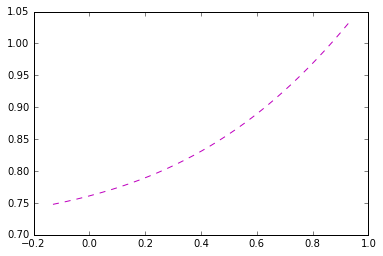

In [356]:
# Helium Ignition
rho_c = np.linspace(logd_05.min(), logd_05.max(), 50)
temp_c=np.polyval([-0.113,8.9], rho_c) # -0.113 is like the slope (m) and 8.9 is like y-intercept (b)

plt.plot(rho_c,temp_c,'g--')

# Boundary
plt.figure()
rho_c = np.linspace(logd_15.min(), logd_15.max(), 5000)
temp_c = np.polyval([(2./3.),np.log10(126100)],rho_c)
plt.plot(np.log10(rho_c), np.log10(temp_c), 'm--', label='$Electron\ Degeneracy$')

[  5.59435572   5.59540975   5.59646377 ...,  10.86130218  10.8623562
  10.86341022]


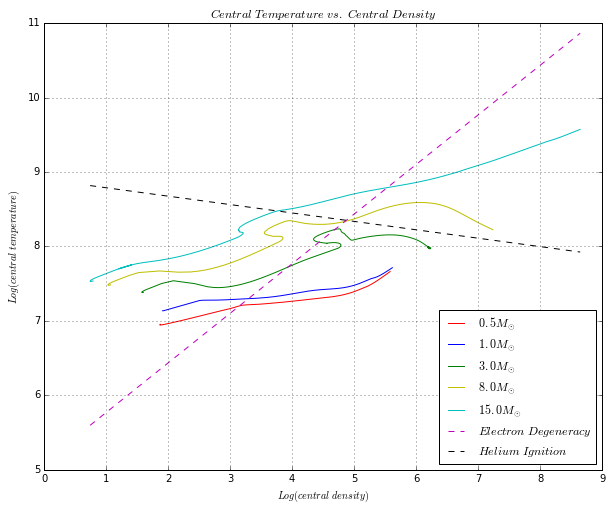

In [357]:
plt.figure(figsize=(10,8))
plt.plot(logd_05,logt_05,'r',label='$0.5 M_{\odot}$')

plt.plot(logd_1,logt_1,'b',label='$1.0 M_{\odot}$')

plt.plot(logd_3,logt_3,'g',label='$3.0 M_{\odot}$')

plt.plot(logd_8,logt_8,'y',label='$8.0 M_{\odot}$')

plt.plot(logd_15,logt_15,'c',label='$15.0 M_{\odot}$')

# Boundary
rho_c = np.linspace(logd_15.min(), logd_15.max(), 5000)
print (temp_c)
temp_c = np.polyval([(2./3.),np.log10(126100)],rho_c)
plt.plot(rho_c, temp_c, 'm--', label='$Electron\ Degeneracy$')

# Helium Ignition

temp_c2=np.polyval([-0.113,8.9], rho_c)
plt.plot(rho_c, temp_c2, 'k--', label='$Helium\ Ignition$')

plt.grid(True)
plt.title('$Central\ Temperature\ vs.\ Central\ Density$')
plt.xlabel('$Log(central\ density)$')
plt.ylabel('$Log(central\ temperature)$')
plt.legend(loc='lower right')
plt.savefig('Central_Temperature_vs._Central_Density.png')

Stars with solar masses 3, 8 and 15 will ignite helium explosively. This is illustrated in the kink in each corresponding graph which shows a sudden increase in temperature. These stars are able to reach a high enough temperature to ignite helium explosively.